**Motorleaf's Assessment**
---
Ali Ebrahimi

Email: Ali.Ebrahimi68@gmail.com

Phone: 613-262-3905

URL : https://github.com/Ali-Ebrahimi/Data-Science-Projects






# **1. Import Libraries and Data**

In this section, I import some of the general libreries, use CoLab to run my models, and read the data.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [0]:
import io
df = pd.read_csv(io.BytesIO(uploaded['dataset.csv']))

# **2. Data Cleaning and Splitting**
In this section, I tried to analyis dataset and finding for missing values and spilliting dataset to test and train.

I just see some missing target which are considerd as test data, and it dosent have effect in our training. I predict them with my models at the end of each section.

In [0]:
# Create table for missing data analysis
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [0]:
draw_missing_data_table(df)

,Total,Percent
yield,16,0.122137
4340,0,0.000000
1448,0,0.000000
1442,0,0.000000
1443,0,0.000000
...,...,...
2888,0,0.000000
2887,0,0.000000
2886,0,0.000000
2885,0,0.000000


In [0]:
DF_Train = df.iloc[0:114,1:4342]
DF_Test = df.iloc[115:130,1:4342]


In [0]:
# df.dropna(subset=['yield'], inplace=True)
# draw_missing_data_table(df)

# **3. Feature Selection and Modelling**
In this section I used three methods for feature selection like **Pearson**, **Spearman**, **Select K Best** and **Extra Trees Regressor** and try to tune hyperparameter for my Deeplearning model like Number of Neurons, Number of Epochs and Batch size. (I try to optimize optimizer and find the best activation function, but because of time and hardware limitation I couldn't do it for all models.)

My challege in this section is find the best method to select the most relevant features and buld the most accuarte model by tuning hyperparameters.

## **3.1 Pearson**

### 3.1.1 Data Prepration

In this section, I select features using Pearson method. I select variables with more that 0.5 correlation (Positive or Negative) and normalize data.

In [0]:
corr_pearson = DF_Train.corr(method='pearson').sort_values('yield', ascending=False)
correlation_pearson = corr_pearson[['yield']]
# plt.figure(figsize=(12,700))
# sns.heatmap(data=correlation_pearson,annot=True)
# plt.title('Heatmap of Correlation')

In [0]:
DF_Train_pearson = DF_Train.iloc[:,(correlation_pearson.iloc[:,0].values >= 0.5) | (correlation_pearson.iloc[:,0].values <= -0.5)]
DF_Test_pearson = DF_Test.iloc[:,(correlation_pearson.iloc[:,0].values >= 0.5) | (correlation_pearson.iloc[:,0].values <= -0.5)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  


In [0]:

X_train = DF_Train_pearson.iloc[:,1:-1]
y_train = DF_Train_pearson.iloc[:,0]

X_test = DF_Test_pearson.iloc[:,1:-1]
y_test = DF_Test_pearson.iloc[:,0]

In [0]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)

### 3.1.2 Model Selection
Here I used GridSearchCV to tune some of Hyperparameters like  Number of Neurons, Number of Epochs and Batch size.

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import Nadam
from keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error

neurons = [30, 40, 50, 60]
batch_size = [10, 20, 30]
epochs = [50, 100, 150]

def create_model(neurons=1):
	# create model
	model = Sequential()
	model.add(Dense(len(X_train[1,:]), input_dim=len(X_train[1,:]), activation='relu'))
	model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
	model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
	model.add(Dense(1, activation='linear'))
	# Compile model
	model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['accuracy'])
	return model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

param_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Using TensorFlow backend.


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning














Best: -19.596095 using {'batch_size': 10, 'epochs': 100, 'neurons': 30}
-36.745017 (13.238332) with: {'batch_size': 10, 'epochs': 50, 'neurons': 30}
-29.958192 (7.525485) with: {'batch_size': 10, 'epochs': 50, 'neurons': 40}
-23.070759 (4.028453) with: {'batch_size': 10, 'epochs': 50, 'neurons': 50}
-33.585127 (8.010572) with: {'batch_size': 10, 'epochs': 50, 'neurons': 60}
-19.596095 (5.457551) with: {'batch_size': 10, 'epochs': 100, 'neurons': 30}
-21.075409 (3.792367) with: {'batch_size': 10, 'epochs': 100, 'neurons': 40}
-21.304610 (4.809884) with: {'batch_size': 10, 'epochs': 100, 'neurons': 50}
-26.201714 (6.117741) with: {'batch_size': 10, 'epochs': 100, 'neurons': 60}
-19.907845 (4.860549) with: {'batch_size': 10, 'epochs': 150, 'neurons': 30}
-20.225716 (4.870500) with: {'batch_size': 10, 'epochs': 150, 'neurons': 40}
-19.759006 (7.033930) with: {'batch_size': 10, 'epochs': 150, 'neurons': 50}
-22.619009 (6.314815) with: {'batch_size': 10, 'epochs': 150, 'neurons':

### Complete Results

This is complete model with finding the best optimizer and the best activation function. I just run ir one time because of my limitation.

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import Nadam
from keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error

neurons = [1, 5, 10, 15, 20, 25, 30]
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']

def create_model(optimizer='adam',activation='relu',neurons=1):
	# create model
	model = Sequential()
	model.add(Dense(394, input_dim=394, activation='relu'))
	model.add(Dense(394, input_dim=394, activation='relu'))
	model.add(Dense(394, input_dim=394, activation='relu'))
	model.add(Dense(1, activation='linear'))
	# Compile model
	model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['accuracy'], validation_split = 0.2)
	return model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

param_grid = dict(batch_size=batch_size, epochs=epochs, optimizer=optimizer, activation=activation, neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))



/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: -13.001544 using {'activation': 'relu', 'batch_size': 80, 'epochs': 50, 'neurons': 1, 'optimizer': 'Adam'}
-17.861560 (4.780743) with: {'activation': 'softmax', 'batch_size': 10, 'epochs': 10, 'neurons': 1, 'optimizer': 'SGD'}
-13.788343 (2.839180) with: {'activation': 'softmax', 'batch_size': 10, 'epochs': 10, 'neurons': 1, 'optimizer': 'RMSprop'}
-15.757504 (4.828944) with: {'activation': 'softmax', 'batch_size': 10, 'epochs': 10, 'neurons': 1, 'optimizer': 'Adagrad'}
-16.114201 (3.453415) with: {'activation': 'softmax', 'batch_size': 10, 'epochs': 10, 'neurons': 1, 'optimizer': 'Adadelta'}
-18.418775 (6.254871) with: {'activation': 'softmax', 'batch_size': 10, 'epochs': 10, 'neurons': 1, 'optimizer': 'Adam'}
-17.875405 (5.061146) with: {'activation': 'softmax', 'batch_size': 10, 'epochs': 10, 'neurons': 1, 'optimizer': 'Adamax'}
-17.387394 (5.515455) with: {'activation': 'softmax', 'batch_size': 10, 'epochs': 10, 'neurons': 1, 'optimizer': 'Nadam'}
-17.596257 (5.810726) with: 

### 3.1.3 Modelling, Forecasting and Testing
In this section, I used tuned hyperparameters, to build my model, Plot results, forecast test data and calculate MAPE.

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import Nadam
from keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor

# define base model
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model = Sequential()
# Add an input layer 
model.add(Dense(len(X_train[1,:]), activation='relu', input_shape=len(X_train[1,:]),)))
# Add hidden layer 
model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
# Add an output layer 
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_absolute_percentage_error', optimizer=opt, metrics=['accuracy'])

# Model output shape
model.output_shape
# Model summary
model.summary()
# Model config
# model.get_config()

H = model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], validation_split = 0.2)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 394)               155630    
_________________________________________________________________
dense_23 (Dense)             (None, 30)                11850     
_________________________________________________________________
dense_24 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_25 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_26 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 31        
Total params: 170,301
Trainable params: 170,301
Non-trainable params: 0
________________________________________________

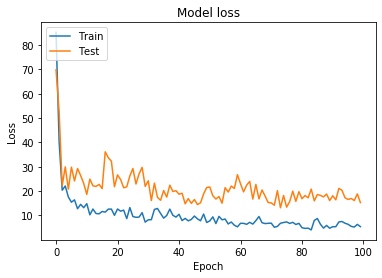

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test_Validation'], loc='upper left')
plt.show()

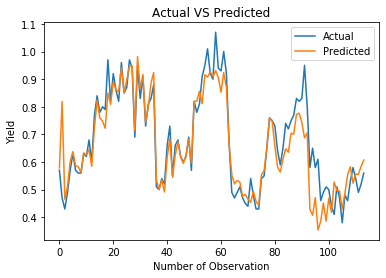

In [0]:
preds = model.predict(X_train)

# plot Actual VS Predicted
plt.plot(y_train)
plt.plot(preds)
plt.title('Actual VS Predicted')
plt.ylabel('Yield')
plt.xlabel('Number of Observation')
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()

Text(0.5, 1.0, 'Forecasting Test Data')

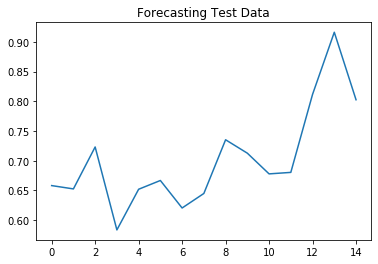

In [0]:
# Forecast test data and plot them
preds_test = model.predict(X_test)
plt.plot(preds_test)
plt.title('Forecasting Test Data')


In [0]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_Pearson = mean_absolute_percentage_error(y_train.values, preds[:,0]) 

print("MAPE for Pearson is: %f %%" % (MAPE_Pearson))


MAPE for Pearson is: 7.341403 %


## **3.2 Spearman**

### 3.2.1 Data Prepration

In this section, I select features using Spearman method. I select variables with more that 0.5 correlation (Positive or Negative) and normalize data.

In [0]:
corr_spearman = df.corr(method='spearman').sort_values('yield', ascending=False)
correlation_spearman = corr_spearman[['yield']]
# plt.figure(figsize=(12,700))
# sns.heatmap(data=correlation_spearman,annot=True)
# plt.title('Heatmap of Correlation')

In [0]:
# pd.set_option('display.max_rows', 200)
correlation_spearman

,yield
yield,1.000000
17,0.770795
327,0.762949
2497,0.762949
637,0.750210
...,...
2795,NaN
3105,NaN
3415,NaN
3725,NaN


In [0]:
DF_Train_spearman = DF_Train.iloc[:, (correlation_spearman.iloc[:,0].values >= 0.5) | (correlation_spearman.iloc[:,0].values <= -0.5)]
DF_Test_spearman = DF_Test.iloc[:,(correlation_spearman.iloc[:,0].values >= 0.5) | (correlation_spearman.iloc[:,0].values <= -0.5)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in less_equal
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in less_equal
  


In [0]:
X_train = DF_Train_spearman.iloc[:,1:-1]
y_train = DF_Train_spearman.iloc[:,0]

X_test = DF_Test_spearman.iloc[:,1:-1]
y_test = DF_Test_spearman.iloc[:,0]

In [0]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)

### 3.2.2 Model Selection
Here I used GridSearchCV to tune some of Hyperparameters like  Number of Neurons, Number of Epochs and Batch size.

In [0]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import Nadam
from keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error

neurons = [30, 40, 50, 60]
batch_size = [10, 20, 30]
epochs = [50, 100, 150]

def create_model(neurons=1):
	# create model
	model = Sequential()
	# Add an input layer 
	model.add(Dense(len(X_train[1,:]), activation='relu', input_shape=len(X_train[1,:]),)))
	# Add hidden layer 
	model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
	model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
	model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
	model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
	# Add an output layer 
	model.add(Dense(1, activation='linear'))
	# Compile model
	model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['accuracy'])
	return model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

param_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


### 3.2.3 Modelling, Forecasting and Testing
In this section, I used tuned hyperparameters, to build my model, Plot results, forecast test data and calculate MAPE.

In [59]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import Nadam
from keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor

# define base model
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model = Sequential()
# Add an input layer 
model.add(Denselen(X_train[1,:]), activation='relu', input_shape=len(X_train[1,:]),)))
# Add one hidden layer 
model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
# Add an output layer 
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_absolute_percentage_error', optimizer=opt, metrics=['accuracy'])

# Model output shape
model.output_shape
# Model summary
model.summary()
# Model config
# model.get_config()

H = model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], validation_split = 0.2)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 661)               437582    
_________________________________________________________________
dense_50 (Dense)             (None, 30)                19860     
_________________________________________________________________
dense_51 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_52 (Dense)             (None, 30)                930       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 31        
Total params: 459,333
Trainable params: 459,333
Non-trainable params: 0
_________________________________________________________________
Train on 91 samples, validate on 23 samples
Epoch 1/150
91/91 [==============================] - 1s 10ms/step - l

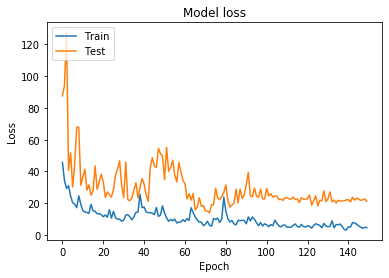

In [60]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

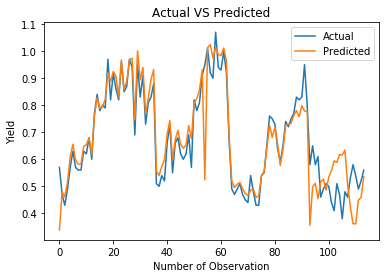

In [61]:
preds = model.predict(X_train)

plt.plot(y_train)
plt.plot(preds)
plt.title('Actual VS Predicted')
plt.ylabel('Yield')
plt.xlabel('Number of Observation')
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()

Text(0.5, 1.0, 'Forecasting Test Data')

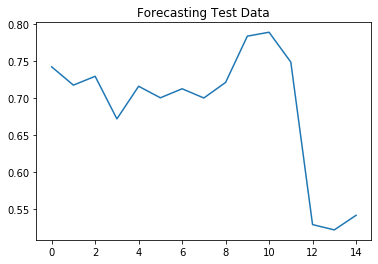

In [62]:
preds_test = model.predict(X_test)
plt.plot(preds_test)
plt.title('Forecasting Test Data')

In [64]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_Spearman = mean_absolute_percentage_error(y_train.values, preds[:,0]) 

print("MAPE for Spearman is: %f %%" % (MAPE_Spearman))

MAPE for Spearman is: 8.547046 %


## **3.3 Select K Best**

### 3.3.1 Data Prepration

In [65]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = df.iloc[0:114,2:4341]  #independent columns
y = df.iloc[0:114,1]    #target column 
bestfeatures = SelectKBest(score_func=f_regression)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
feature_Scores = pd.concat([dfcolumns,dfscores],axis=1)
feature_Scores.columns = ['ColName','Score']  #naming the dataframe columns
# print(feature_Scores.nlargest(100,'Score'))  #print 100 best features
feature_Scores['Score'].values
feature_Scores.nlargest(300,'Score')

/usr/local/lib/python3.6/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


,ColName,Score
3,4,203.846166
1955,1956,190.147048
4125,4126,190.147048
313,314,185.438358
2483,2484,185.438358
...,...,...
3040,3041,52.559562
1492,1493,52.497212
3007,3008,52.365815
383,384,52.168271


In [0]:
DF_Train1 = DF_Train.iloc[:,1:-1]
DF_Test1 = DF_Test.iloc[:,1:-1]

In [67]:
DF_Train_SelectKBest = DF_Train1.iloc[:,(feature_Scores['Score'].values >= 100)]
DF_Test_SelectKBest = DF_Test1.iloc[:,(feature_Scores['Score'].values >= 100)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in greater_equal
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater_equal
  


In [0]:
X_train = DF_Train_SelectKBest.iloc[:,1:-1]
y_train = DF_Train_SelectKBest.iloc[:,0]

X_test = DF_Test_SelectKBest.iloc[:,1:-1]
y_test = DF_Test_SelectKBest.iloc[:,0]

In [0]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)

### 3.3.2 Model Selection
Here I used GridSearchCV to tune some of Hyperparameters like  Number of Neurons, Number of Epochs and Batch size.

In [84]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import Nadam
from keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error

neurons = [30, 40, 50, 60]
batch_size = [10, 20, 30]
epochs = [50, 100, 150]

def create_model(neurons=1):
	# create model
	model = Sequential()
	# Add an input layer 
	model.add(Dense(len(X_train[1,:]), activation='relu', input_shape=(len(X_train[1,:]),)))
	# Add hidden layer 
	model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
	model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
	model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
	model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
	# Add an output layer 
	model.add(Dense(1, activation='linear'))
	# Compile model
	model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['accuracy'])
	return model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

param_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: -124.202359 using {'batch_size': 10, 'epochs': 200, 'neurons': 50}
-234.973285 (144.304954) with: {'batch_size': 10, 'epochs': 100, 'neurons': 30}
-198.272060 (128.457939) with: {'batch_size': 10, 'epochs': 100, 'neurons': 40}
-187.067895 (138.452541) with: {'batch_size': 10, 'epochs': 100, 'neurons': 50}
-235.764503 (152.271944) with: {'batch_size': 10, 'epochs': 100, 'neurons': 60}
-165.433360 (108.862497) with: {'batch_size': 10, 'epochs': 150, 'neurons': 30}
-193.540583 (123.028313) with: {'batch_size': 10, 'epochs': 150, 'neurons': 40}
-180.303299 (111.277562) with: {'batch_size': 10, 'epochs': 150, 'neurons': 50}
-222.845093 (141.318742) with: {'batch_size': 10, 'epochs': 150, 'neurons': 60}
-239.264684 (169.711343) with: {'batch_size': 10, 'epochs': 200, 'neurons': 30}
-229.991853 (183.882336) with: {'batch_size': 10, 'epochs': 200, 'neurons': 40}
-124.202359 (79.671781) with: {'batch_size': 10, 'epochs': 200, 'neurons': 50}
-150.445076 (97.918624) with: {'batch_size': 10,

### 3.3.3 Modelling, Forecasting and Testing
In this section, I used tuned hyperparameters, to build my model, Plot results, forecast test data and calculate MAPE.

In [85]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import Nadam
from keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor

# define base model
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model = Sequential()
# Add an input layer 
model.add(Dense(len(X_train[1,:]), activation='relu', input_shape=(len(X_train[1,:]),)))
# Add one hidden layer 
model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
# Add an output layer 
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_absolute_percentage_error', optimizer=opt, metrics=['accuracy'])

# Model output shape
model.output_shape
# Model summary
model.summary()
# Model config
# model.get_config()

H = model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], validation_split = 0.2)

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_72 (Dense)             (None, 134)               18090     
_________________________________________________________________
dense_73 (Dense)             (None, 50)                6750      
_________________________________________________________________
dense_74 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_75 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 51        
Total params: 29,991
Trainable params: 29,991
Non-trainable params: 0
_________________________________________________________________
Train on 91 samples, validate on 23 samples
Epoch 1/200
91/91 [==============================] - 1s 13ms/step - los

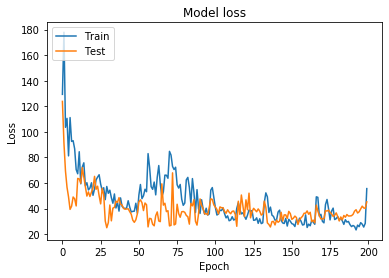

In [86]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

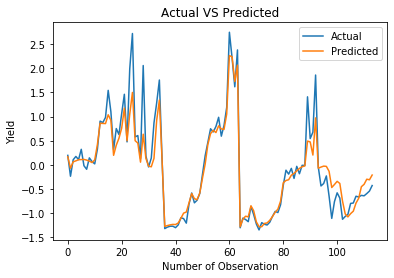

In [87]:
preds = model.predict(X_train)

plt.plot(y_train)
plt.plot(preds)
plt.title('Actual VS Predicted')
plt.ylabel('Yield')
plt.xlabel('Number of Observation')
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()

Text(0.5, 1.0, 'Forecasting Test Data')

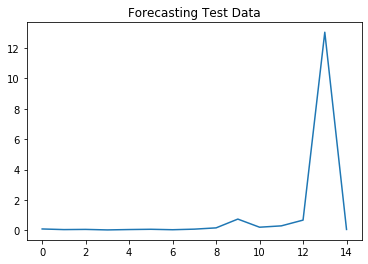

In [88]:
# Forecast test data and plot them

preds_test = model.predict(X_test)
plt.plot(preds_test)
plt.title('Forecasting Test Data')

In [89]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_SelectKBest = mean_absolute_percentage_error(y_train.values, preds[:,0]) 

print("MAPE for Select K Best is: %f %%" % (MAPE_SelectKBest))

MAPE for Select K Best is: 47.096865 %


## **3.4 Extra Trees Regressor** (Feature Importances)

### 3.4.1 Data Prepration

In [125]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
feature_importances = pd.concat([dfcolumns,dfscores],axis=1)
# feature_importances.nlargest(20).plot(kind='barh')
# print(feature_importances.sort_values(ascending=False))  #print 10 best features
# plt.show()
# feature_importances = feature_importances.sort_values(ascending=False)
# feature_importances

[4.67240439e-04 1.74659847e-04 7.02206691e-04 ... 0.00000000e+00
 1.46630848e-07 5.86523390e-07]


In [127]:
feature_importances

,0,0
0,1,4.672404e-04
1,2,1.746598e-04
2,3,7.022067e-04
3,4,3.926558e-02
4,5,0.000000e+00
...,...,...
4334,4335,1.955078e-07
4335,4336,7.820312e-07
4336,4337,0.000000e+00
4337,4338,1.466308e-07


In [0]:
DF_Train1 = DF_Train.iloc[:,1:-1]
DF_Test1 = DF_Test.iloc[:,1:-1]

In [0]:
DF_Train_ExtraTreesRegressor = DF_Train1.iloc[:,(feature_importances.iloc[:,1].values >= 0.02) | (feature_importances.iloc[:,1].values <= -0.02)]
DF_Test_ExtraTreesRegressor = DF_Test1.iloc[:,(feature_importances.iloc[:,1].values >= 0.02) | (feature_importances.iloc[:,1].values <= -0.02)]

In [0]:
X_train = DF_Train_ExtraTreesRegressor.iloc[:,1:-1]
y_train = DF_Train_ExtraTreesRegressor.iloc[:,0]

X_test = DF_Test_ExtraTreesRegressor.iloc[:,1:-1]
y_test = DF_Test_ExtraTreesRegressor.iloc[:,0]

In [0]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)

### 3.4.2 Model Selection
Here I used GridSearchCV to tune some of Hyperparameters like  Number of Neurons, Number of Epochs and Batch size.

In [145]:
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.optimizers import Adam
from keras.optimizers import Nadam
from keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error

neurons = [30, 40, 50, 60]
batch_size = [10, 20, 30]
epochs = [50, 100, 150]

def create_model(neurons=1):
	# create model
	model = Sequential()
	# Add an input layer 
	model.add(Dense(len(X_train[1,:]), activation='relu', input_shape=(len(X_train[1,:]),)))
	# Add hidden layer 
	model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
	model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
	model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
	model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
	# Add an output layer 
	model.add(Dense(1, activation='linear'))
	# Compile model
	model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['accuracy'])
	return model
model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

param_grid = dict(batch_size=batch_size, epochs=epochs, neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best: -47.719265 using {'batch_size': 20, 'epochs': 100, 'neurons': 40}
-209.046730 (219.143954) with: {'batch_size': 10, 'epochs': 50, 'neurons': 30}
-127.072039 (115.068905) with: {'batch_size': 10, 'epochs': 50, 'neurons': 40}
-71.838326 (29.236787) with: {'batch_size': 10, 'epochs': 50, 'neurons': 50}
-119.336714 (121.116373) with: {'batch_size': 10, 'epochs': 50, 'neurons': 60}
-325.292406 (366.735500) with: {'batch_size': 10, 'epochs': 100, 'neurons': 30}
-108.518550 (101.990944) with: {'batch_size': 10, 'epochs': 100, 'neurons': 40}
-156.855116 (122.576227) with: {'batch_size': 10, 'epochs': 100, 'neurons': 50}
-226.975097 (268.989422) with: {'batch_size': 10, 'epochs': 100, 'neurons': 60}
-56.144426 (1.252483) with: {'batch_size': 10, 'epochs': 150, 'neurons': 30}
-139.875450 (100.180993) with: {'batch_size': 10, 'epochs': 150, 'neurons': 40}
-76.253644 (27.526448) with: {'batch_size': 10, 'epochs': 150, 'neurons': 50}
-71.849859 (26.719136) with: {'batch_size': 10, 'epochs': 1

### 3.4.3 Modelling, Forecasting and Testing
In this section, I used tuned hyperparameters, to build my model, Plot results, forecast test data and calculate MAPE.

In [146]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.optimizers import Nadam
from keras.optimizers import RMSprop
from sklearn.metrics import mean_squared_error
from keras.wrappers.scikit_learn import KerasRegressor

# define base model
opt = Adam(lr=1e-3, decay=1e-3 / 200)

model = Sequential()
# Add an input layer 
model.add(Dense(len(X_train[1,:]), activation='relu', input_shape=(len(X_train[1,:]),)))
# Add one hidden layer 
model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
model.add(Dense(grid_result.best_params_['neurons'], activation='relu'))
# Add an output layer 
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_absolute_percentage_error', optimizer=opt, metrics=['accuracy'])

# Model output shape
model.output_shape
# Model summary
model.summary()
# Model config
# model.get_config()

H = model.fit(X_train, y_train, epochs=grid_result.best_params_['epochs'], batch_size=grid_result.best_params_['batch_size'], validation_split = 0.2)

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 11)                132       
_________________________________________________________________
dense_84 (Dense)             (None, 40)                480       
_________________________________________________________________
dense_85 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_86 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 41        
Total params: 3,933
Trainable params: 3,933
Non-trainable params: 0
_________________________________________________________________
Train on 91 samples, validate on 23 samples
Epoch 1/100
91/91 [==============================] - 1s 14ms/step - loss:

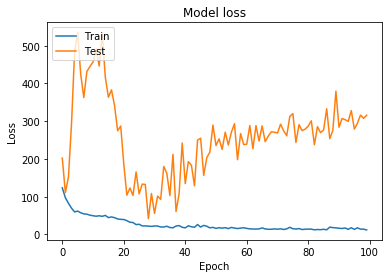

In [147]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

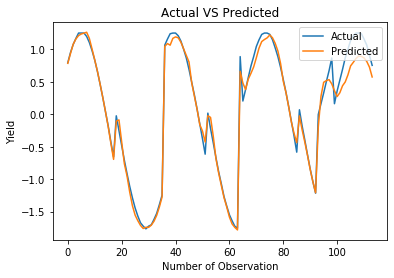

In [148]:
preds = model.predict(X_train)

plt.plot(y_train)
plt.plot(preds)
plt.title('Actual VS Predicted')
plt.ylabel('Yield')
plt.xlabel('Number of Observation')
plt.legend(['Actual', 'Predicted'], loc='upper right')
plt.show()

Text(0.5, 1.0, 'Forecasting Test Data')

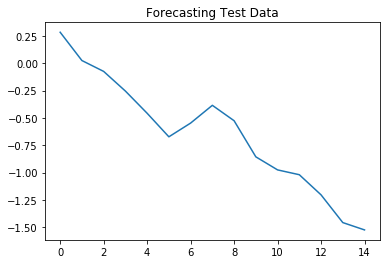

In [149]:
# Forecast test data and plot them

preds_test = model.predict(X_test)
plt.plot(preds_test)
plt.title('Forecasting Test Data')

In [150]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

MAPE_ExtraTreesRegressor = mean_absolute_percentage_error(y_train.values, preds[:,0]) 

print("MAPE for Extra Trees Regressor is: %f %%" % (MAPE_ExtraTreesRegressor))

MAPE for Extra Trees Regressor is: 76.997516 %


# **4. Summary**

I used three diffrent methods for feaure selection. As you can see there is MAPE for all of them.
The best feature selections are **Pearson** and **Spearman** with 7.3% and 8.5% error.
As a brife introduction for these feature selection methods.

**Pearson** or **Pearson’s Correlation Coefficient** is a method to figure out ***linear*** correleation when our inouts and output are numerical.

**Spearman** or **Spearman’s Rank Coefficient** is a raked based method to figure out ***nonlinear*** correleation when our inouts and output are numerical.

As a final result, I can conclude taht **Pearson** can be the best method for feature selection since the model which create using this methos not only has the best MAPE, but it also hae the best prediction for the test data(all of predicted targets are beetween 0 and 1), also by  **Comparing** actual and predict series at the end of secrion 3.1.3 we can see that our model works nicely.

In [151]:
print(" MAPE for Pearson is: %s %% \n MAPE for Spearman is: %s %% \n MAPE for Select K Best is: %s %% \n MAPE for Extra Trees Regressor is: %s %%" % 
      (MAPE_Pearson, MAPE_Spearman, MAPE_SelectKBest, MAPE_ExtraTreesRegressor))

 MAPE for Pearson is: 7.341403058047977 % 
 MAPE for Spearman is: 8.547046186226597 % 
 MAPE for Select K Best is: 47.096864659902195 % 
 MAPE for Extra Trees Regressor is: 76.99751596869216 %
